In [1]:
1+2

3

In [2]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
from unc_funcs import *
from unc_samples import *
from unc_MC_overhead import *

[0.39431672 0.04210058 0.91800973]
evtdf.shape before enforcing correct FV w/ uncontained track lenght: (922707, 266)
evtdf.shape after enforcing correct FV w/ uncontained track lenght: (888306, 266)


/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib64/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exp/icarus/app/users/jdyer/dev_new_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/e

In [4]:
savestuff = True
savedir = '/exp/icarus/data/users/jdyer/muon_selection/result_dfs/all_cuts_2408/sensitivities/'

print(GOAL_POT) 
print(POTSTR) 

2.41e+20
2.41e20 POT


In [5]:
#dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/ALP500MeV_faE6/'
#dir = '/icarus/data/users/jdyer/muon_selection/newF_dfs/'
dir = '/exp/icarus/data/users/jdyer/muon_selection/result_dfs/all_cuts_2408/'

selected_evtdf = pd.read_pickle(dir + 'final_evtdf')
mc_res = pd.read_pickle(dir + 'res_mc')
pc_res = pd.read_pickle(dir + 'res_percent')
pot_res = pd.read_pickle(dir + 'res_pot')


In [6]:
mc_res

,"$M_S$ = 220, $\theta_S$ = 1e-05","$M_S$ = 240, $\theta_S$ = 1e-05","$M_S$ = 260, $\theta_S$ = 1e-05","$M_S$ = 280, $\theta_S$ = 1e-05","$M_S$ = 300, $\theta_S$ = 1e-05","$M_S$ = 340, $\theta_S$ = 1e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'",$\nu$,Cosmic
preselection,2808,6046,7890,5222,9127,13047,12839,15445,871,181065,247773
below 0_5cm dEdx <= 50 MeV/cm,2581,5586,7164,4777,8315,11916,11979,14403,802,157640,228073
up to 1cm dEdx <= 35 MeV/cm,2564,5569,7144,4765,8282,11858,11943,14353,798,147001,220097
up to 2cm dEdx <= 15 MeV/cm,2484,5412,6924,4638,8034,11541,11587,13902,777,125868,201446
up to 3cmdEdx <= 10 MeV/cm,2380,5212,6654,4469,7761,11174,11128,13418,747,113989,191148
max shower len < 0.0 cm,2013,4630,5938,3998,6971,9936,9443,11716,649,70084,151363
both chi2mu < 13,1536,3576,4619,3037,5277,7224,6570,7860,444,33757,65395
both chi2p > 90,1498,3524,4538,2993,5187,7113,6477,7769,439,32180,62725
S_NuMI_angle < 3 deg,691,1803,2432,1522,2525,3131,3755,3414,254,1406,34
opening angle < 15 deg,626,1399,1456,682,832,782,2598,1134,145,100,5


In [7]:
pot_res

,"$M_S$ = 220, $\theta_S$ = 1e-05","$M_S$ = 240, $\theta_S$ = 1e-05","$M_S$ = 260, $\theta_S$ = 1e-05","$M_S$ = 280, $\theta_S$ = 1e-05","$M_S$ = 300, $\theta_S$ = 1e-05","$M_S$ = 340, $\theta_S$ = 1e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'",$\nu$,Cosmic
preselection,0.01,0.06,0.17,0.26,0.30,0.22,4.20,0.03,0.0,26620.69,50180.65
below 0_5cm dEdx <= 50 MeV/cm,0.01,0.06,0.15,0.24,0.28,0.20,3.92,0.03,0.0,23041.18,46170.11
up to 1cm dEdx <= 35 MeV/cm,0.01,0.06,0.15,0.24,0.27,0.20,3.91,0.03,0.0,21363.36,44563.63
up to 2cm dEdx <= 15 MeV/cm,0.00,0.06,0.15,0.23,0.27,0.19,3.79,0.03,0.0,18062.51,40778.17
up to 3cmdEdx <= 10 MeV/cm,0.00,0.06,0.14,0.22,0.26,0.19,3.64,0.03,0.0,16143.06,38695.23
max shower len < 0.0 cm,0.00,0.05,0.13,0.20,0.23,0.17,3.09,0.02,0.0,9585.55,30635.85
both chi2mu < 13,0.00,0.04,0.10,0.15,0.17,0.12,2.15,0.02,0.0,4457.36,13246.08
both chi2p > 90,0.00,0.04,0.10,0.15,0.17,0.12,2.12,0.02,0.0,4221.15,12702.32
S_NuMI_angle < 3 deg,0.00,0.02,0.05,0.08,0.08,0.05,1.23,0.01,0.0,142.79,0.99
opening angle < 15 deg,0.00,0.02,0.03,0.03,0.03,0.01,0.85,0.00,0.0,7.17,0.00


In [8]:
categories = make_categories(selected_evtdf, detailed_bsm=True)
for sample in categories:
    print(sample.name)

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


In [11]:
for c in selected_evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 'momentum', 'x', '', '')
('slc', 'truth', 'momentum', 'y', '', '')
('slc', 'truth', 'momentum', 'z', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'parent_pdg', '', '', '')
('slc', 'truth', 'parent_dc

In [12]:
pd.DataFrame(selected_evtdf['proc'])

proc
sample __ntuple entry rec.slc..index                                             
0      21       37    17                    1129.0
Name: (21, 37), dtype: float64
       29       38    17                    1120.0
Name: (29, 38), dtype: float64
       34       47    0                     1039.0
Name: (34, 47), dtype: float64
       39       41    19                    1302.0
Name: (39, 41), dtype: float64
       64       17    1                     1005.0
Name: (64, 17), dtype: float64
...                                                                           ...
10     7733     51    10                  8828.0
Name: (7733, 51), dtype: float64
       7896     15    0                   9151.0
Name: (7896, 15), dtype: float64
       8095     8     1                    6079.0
Name: (8095, 8), dtype: float64
       8363     55    0                   9099.0
Name: (8363, 55), dtype: float64
       8907     45    16                  7588.0
Name: (8907, 45), dtype: float64

[6213 rows x 1 columns]

In [11]:
pd.DataFrame(selected_evtdf['cluster'])

cluster
sample __ntuple entry rec.slc..index                                                 
0      10       6     0                                                     1898902.0
       49       2     1                                                     1898902.0
       87       20    10                                                    1898902.0
       105      15    14                                                    1898902.0
       110      13    0                                                     1898902.0
...                                                                               ...
12     4279     172   1                   4444026.0
Name: (4279, 172), dtype: float64
       4444     45    0                    4444026.0
Name: (4444, 45), dtype: float64
       4502     127   19                  4444026.0
Name: (4502, 127), dtype: float64
       6150     236   17                  4444026.0
Name: (6150, 236), dtype: float64
       6645     120   0                   4444026.0
Name: (6645, 120), dtype: float64

[17267 rows x 1 columns]

# HPS

In [18]:
higgs_mcdfs = [pd.read_hdf(f, key="mch") for f in higgs_files]
higgs_masses = [int(round(df.iloc[(0)].M*1000.)) for df in higgs_mcdfs]
higgs_thetas = [float(df.iloc[(0)].C1) for df in higgs_mcdfs]

In [19]:
%%time
# MY WAY

#low_lim = []
#low_lim_count = [] 
#hi_lim = []
#hi_lim_count = []
test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(6):
    new_n = []
    df = selected_evtdf[categories[i]]
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    for new_mixing in test_thetas:
        rescale_new_mixing = []
        for idx in df.index:
            #print(idx)
            row = higgs_mcdfs[i].loc[(idx[1],idx[2], 0)]
            factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
            #print(factor)
            rescale_new_mixing.append(factor)
        #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        #print(df.shape, len(rescale_new_mixing), x, sep=', ')
        new_n.append(x)
    higgs_new_ns.append(np.array(new_n))
    print('Best theta: ', test_thetas[np.argmax(np.array(new_n))], '\n')
    #break
    
    #plt.plot(test_thetas, np.array(new_n), '-o', label=name.split(',')[0], color=blues[i])
    #plt.xscale('log')
    #plt.title(name.split(',')[0])
    #plt.ylabel("Candidates / %s" % POTSTR)
    #plt.xlabel("$\\theta$")
    #plt.show()

#plt.xscale('log')
#plt.title('Higgs Portal Scalars that pass selection')
#plt.ylabel("Candidates / %s" % POTSTR)
#plt.xlabel("$\\theta$")
#plt.legend()
#plt.show()

        

Working on '$M_S$ = 220, $\\theta_S$ = 1e-05'
Best theta:  0.0003630780547701014 

Working on '$M_S$ = 240, $\\theta_S$ = 1e-05'
Best theta:  0.0001445439770745928 

Working on '$M_S$ = 260, $\\theta_S$ = 1e-05'
Best theta:  0.00010964781961431851 

Working on '$M_S$ = 280, $\\theta_S$ = 1e-05'
Best theta:  5.248074602497723e-05 

Working on '$M_S$ = 300, $\\theta_S$ = 1e-05'
Best theta:  3.9810717055349695e-05 

Working on '$M_S$ = 340, $\\theta_S$ = 1e-05'
Best theta:  3.0199517204020192e-05 

CPU times: user 8min 4s, sys: 8.84 s, total: 8min 13s
Wall time: 8min 22s


In [52]:
%%time
# JOSH'S WAY (use intersection of dataframes)

test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(6):
    new_n = []
    df = selected_evtdf[categories[i]].loc[i].droplevel('rec.slc..index')
    mc = higgs_mcdfs[i].droplevel('rec.mc.prtl..index')
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    for new_mixing in test_thetas:
        #rescale_new_mixing = []
        ##cd_for_w = this_mcdf.loc[this_mcdf.index.intersection(this_evtdf.index), ("C","D")]
        ##cd_for_w["RW"] = cd_for_w.apply(lambda x : reweight(a = x["C"],b = x["D"]), axis = 1)
        #intersection = higgs_mcdfs[i].index.intersection(df.index)
        #cd_for_w.index.droplevel('rec.slc..index').intersection(new.index.droplevel('rec.mc.prtl..index'))
        intersection = mc.index.intersection(df.index)
        #cd_for_w = higgs_mcdfs[i].loc[intersection, 
        #                              ["start","enter", "exit", "decay_length"]]
        cd_for_w = mc.loc[intersection, ["start","enter", "exit", "decay_length"]]
        #print(intersection)
        #cd_for_w = higgs_mcdfs[i].loc[df.index.intersection(higgs_mcdfs[i].index), 
        #                              ["start","enter", "exit", "decay_length"]]
        new = df.loc[intersection]
        rescale_new_mixing = cd_for_w.apply(lambda x : 
                                            float(reweight_mixing(new_mixing, x["start"], x["enter"], 
                                                                  x["exit"], x["decay_length"], old_th)),
                                            axis = 1)
        
        #for idx in df.index:
        #    row = higgs_mcdfs[i].loc[(idx[1],idx[2], 0)]
        #    factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
        #    #print(factor)
        #    rescale_new_mixing.append(factor)
        ##print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        #x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        x = sum(np.array(new.scale)*np.array(rescale_new_mixing))
        #print(new.shape, len(rescale_new_mixing), x, sep=', ')
        new_n.append(x)
    higgs_new_ns.append(np.array(new_n))
    #break
    
    

Working on '$M_S$ = 220, $\\theta_S$ = 5e-05'
CPU times: user 6.2 s, sys: 30.4 ms, total: 6.23 s
Wall time: 6.17 s


In [37]:
cd_for_w
print(new.shape)
print(len(rescale_new_mixing))
df.scale



(14, 207)
14


__ntuple  entry  rec.slc..index
10        6      0                 0.009434
49        2      1                 0.009434
87        20     10                0.009434
105       15     14                0.009434
110       13     0                 0.009434
122       0      13                0.009434
146       2      0                 0.009434
154       6      1                 0.009434
190       19     25                0.009434
193       14     17                0.009434
          21     0                 0.009434
201       20     1                 0.009434
199       20     23                0.009434
202       2      0                 0.009434
225       17     1                 0.009434
227       3      18                0.009434
235       2      0                 0.009434
245       5      8                 0.009434
247       10     0                 0.009434
274       13     15                0.009434
284       23     10                0.009434
281       12     0                 0.009434


In [35]:
#df = selected_evtdf[categories[i]].loc[i]
df

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      10       6     0                            0 -137.550140   80.211090   
       49       2     1                            0 -139.672394  -60.575729   
       87       20    10                           0  210.485367  -56.962399   
       105      15    14                           0  142.216400  -46.298374   
       110      13    0                            0 -165.103683 -161.912247   
       122      0     13                           0  250.796585   53.929626   
       146      2     0                            0 -197.539520   -9.765320   
       154      6     1                            0 -206.986938  -15.005005   
       190      19    25                           0  270.662567   94.388680   
       193      14    17                           0  279.132782    8.091087   
                21    0                            0 -138.661697  -84.157585   
       201      20    1                            0 -210.047302  -20.110046   
       199      20    23                           0  284.081482  -95.449829   
       202      2     0                            0 -125.359375 -170.418274   
       225      17    1                            0 -140.821899 -119.782852   
       227      3     18                           0  288.968536   37.398987   
       235      2     0                            0 -180.073776  -29.640488   
       245      5     8                            0  210.648300  113.705048   
       247      10    0                            0 -139.407974   -1.176378   
       274      13    15                           0  139.659500  -55.110107   
       284      23    10                           0   94.568077  -90.629402   
       281      12    0                            0 -281.777435 -167.320923   
       288      17    1                            0 -136.158234 -141.459091   
       293      17    11                           0  265.629333    4.073792   
       299      17    0                            0 -138.747635 -111.321411   
       323      20    0                            0 -130.857574  -61.670364   
       361      0     0                            0 -191.038788  122.332596   
       366      5     1                            0 -337.390472  111.800217   
       399      1     15                           0  159.940720   49.220825   
       400      15    20                           0  257.769196 -150.307617   
       422      2     10                           0  279.447144  -83.258881   
       429      24    0                            0 -164.759720  108.737915   
       437      11    13                           0   94.665161  116.626083   
       440      24    0                            0 -256.908569  -17.148308   
       453      5     16                           0  237.074188  -44.609650   
       457      7     0                            0 -253.014053  -84.815384   
       460      4     22                           0  210.509445  -14.240295   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index      

In [19]:
print(pd.DataFrame(rescale_new_mixing).shape)
print(df.shape)

(14, 1)
(37, 207)


In [8]:

for c in higgs_mcdfs[0].columns:
    print(c)
    
    #["decay_length"]



('E', '')
('M', '')
('start', 'x')
('start', 'y')
('start', 'z')
('enter', 'x')
('enter', 'y')
('enter', 'z')
('exit', 'x')
('exit', 'y')
('exit', 'z')
('decay_length', '')
('C1', '')
('C2', '')
('C3', '')
('C4', '')
('C5', '')


In [21]:
print(savestuff)
savestuff = False

True


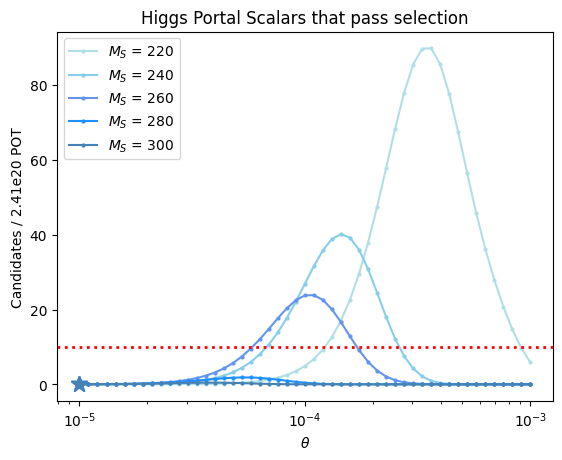

In [22]:
# Overlay all benchmark masses on same plot:

for i in range(5):
    plt.plot(test_thetas, higgs_new_ns[i], '-o', markersize=2, label=categories[i].name.split(',')[0], color=blues[i]) #label=categories[i].name.split(',')[0],
    plt.plot(higgs_thetas[i], sum(np.array(selected_evtdf[categories[i]].scale)),'*', markersize=12, color=blues[i])
plt.xscale('log')
plt.title('Higgs Portal Scalars that pass selection')
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$\\theta$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
if savestuff:
    plt.savefig(dir + "higgs_theta_sensitivity.pdf")
plt.show()



In [12]:
# Skip this cell for now - come back to it when I want to make a real contour plot.
low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []
goal = 10
for i in range(5):
    print(i)
    new_n = np.array(new_ns[i])
    n_prev_from_goal = -10.
    found_low_lim = False
    for j in range(len(new_n)):
        n_current_from_goal = new_n[j]-goal
        if np.sign(n_prev_from_goal) != np.sign(n_current_from_goal): # then you just hit your goal
            #print('yip! ', categories[i].name, n_prev_from_goal, n_current_from_goal, sep=', ')
            if found_low_lim == False:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    low_lim_count.append(new_n[j-1])
                    low_lim.append(test_thetas[j-1])
                else:
                    low_lim_count.append(new_n[j])
                    low_lim.append(test_thetas[j])
                found_low_lim = True
            else:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    hi_lim_count.append(new_n[j-1])
                    hi_lim.append(test_thetas[j-1])
                else:
                    hi_lim_count.append(new_n[j])
                    hi_lim.append(test_thetas[j])
        n_prev_from_goal = n_current_from_goal
    if new_n[new_n >= goal].shape[0] == 0:
        low_lim_count.append(-1)
        low_lim.append(-1)
        hi_lim_count.append(-1)
        hi_lim.append(-1)
        

0


NameError: name 'new_ns' is not defined

# ALPs

In [25]:
for c in alp_nosup_mcdfs[0].columns:
    print(c)
float(alp_nosup_mcdfs[0].iloc[0].C2)

print(dir)

('time', '')
('E', '')
('M', '')
('start', 'x')
('start', 'y')
('start', 'z')
('enter', 'x')
('enter', 'y')
('enter', 'z')
('exit', 'x')
('exit', 'y')
('exit', 'z')
('decay_length', '')
('allowed_decay_fraction', '')
('C1', '')
('C2', '')
('C3', '')
('C4', '')
('C5', '')
/exp/icarus/data/users/jdyer/muon_selection/result_dfs/all_cuts_2408/


In [10]:
for c in categories:
    print(c.name)
#alp_nosup_cls

$M_S$ = 220, $\theta_S$ = 1e-05
$M_S$ = 240, $\theta_S$ = 1e-05
$M_S$ = 260, $\theta_S$ = 1e-05
$M_S$ = 280, $\theta_S$ = 1e-05
$M_S$ = 300, $\theta_S$ = 1e-05
$M_S$ = 340, $\theta_S$ = 1e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'
$\nu$
Cosmic


NameError: name 'alp_nosup_cls' is not defined

In [13]:
print(savestuff)

True


Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'"; new cl = 0.027777777777777776


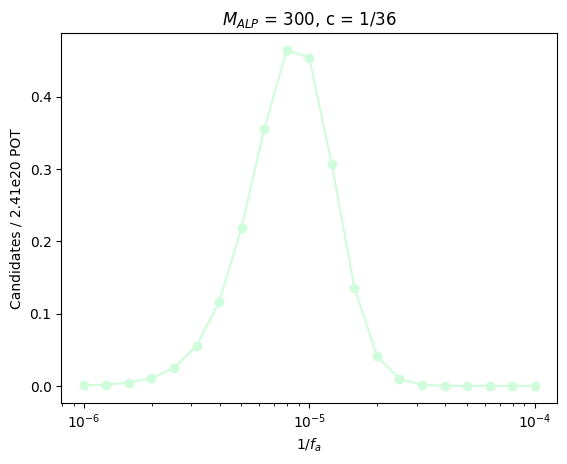

Scanning over fa's for "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.027777777777777776


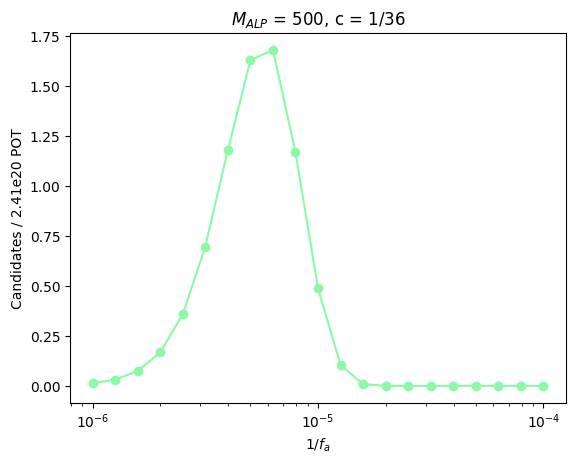

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.027777777777777776


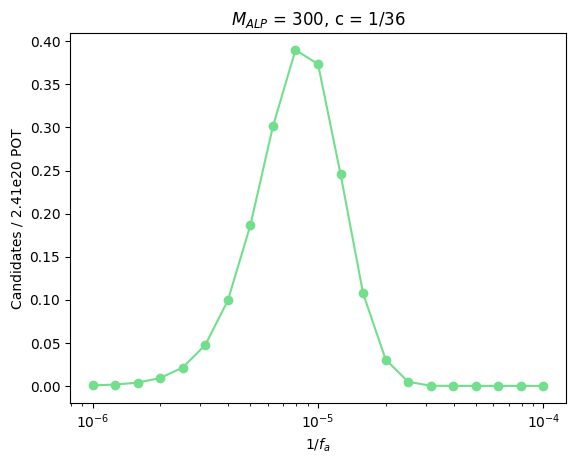

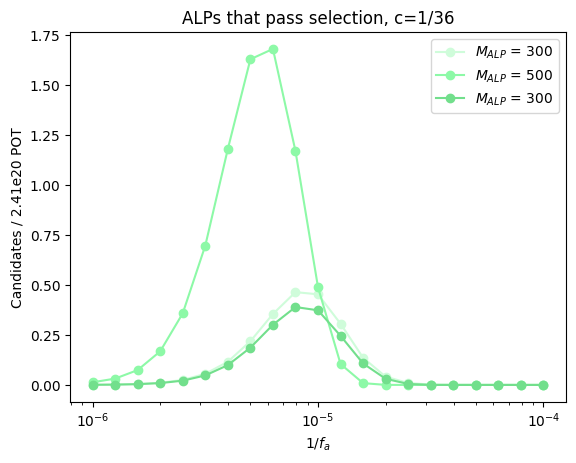

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'"; new cl = 0.01


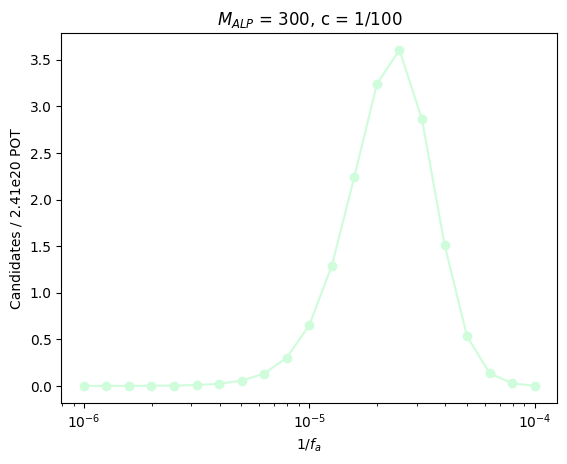

Scanning over fa's for "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.01


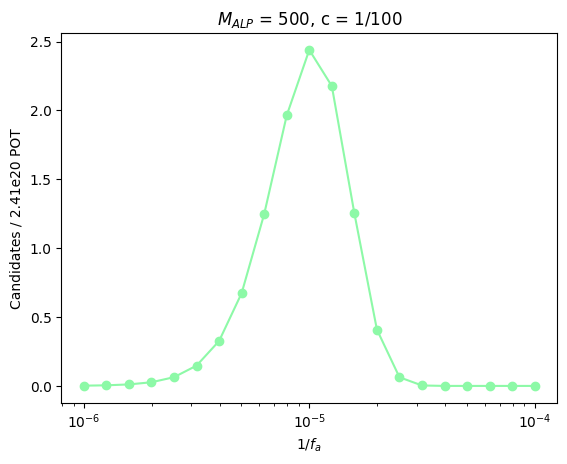

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.01


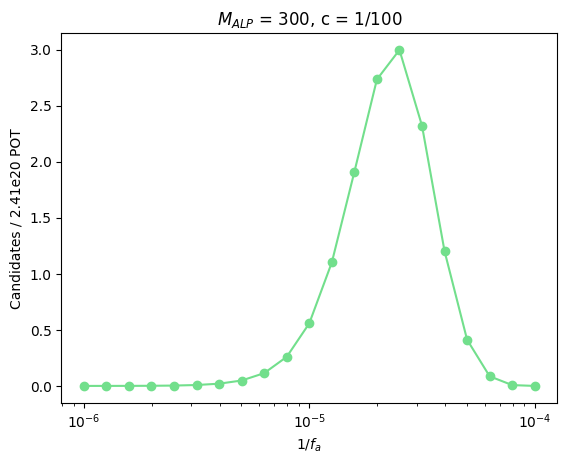

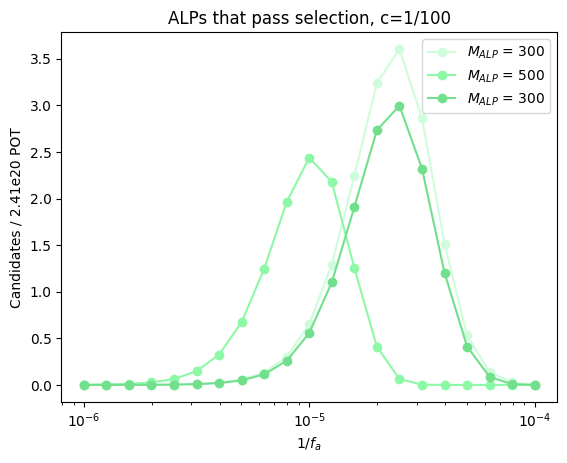

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'"; new cl = 0.0033333333333333335


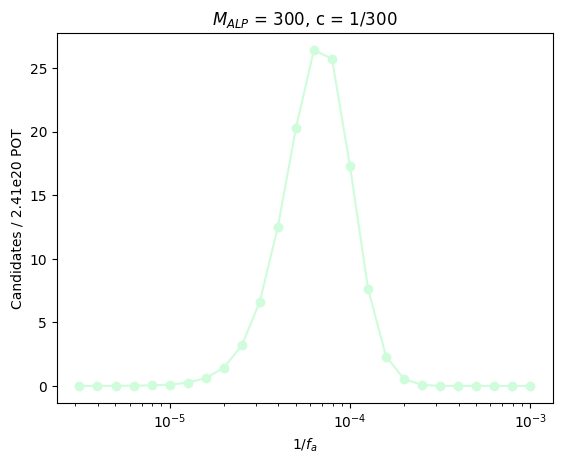

Scanning over fa's for "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.0033333333333333335


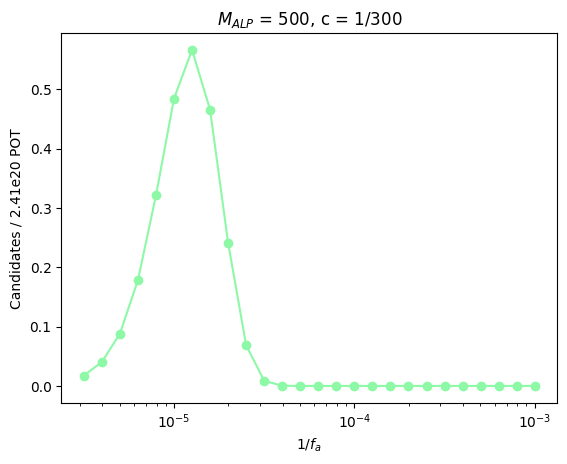

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.0033333333333333335


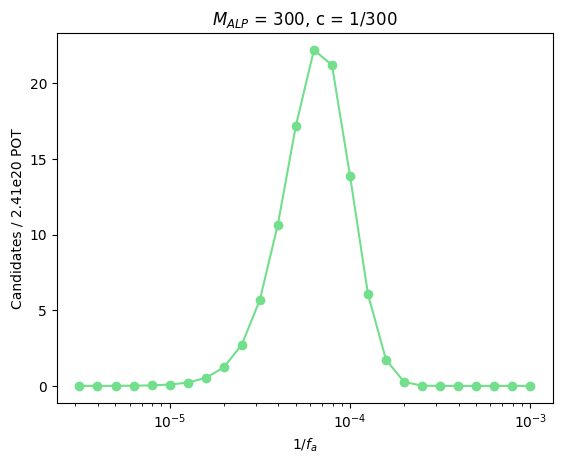

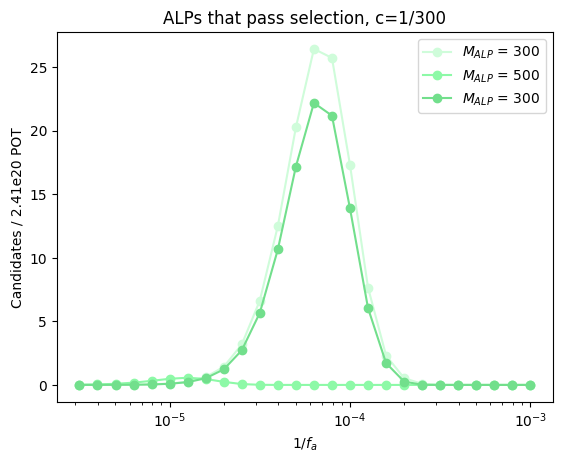

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'"; new cl = 0.001


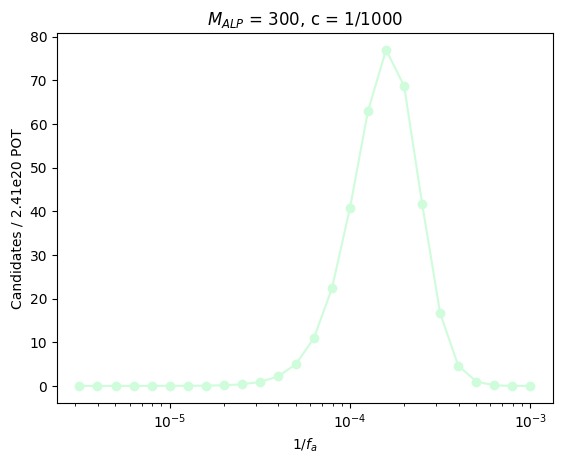

Scanning over fa's for "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.001


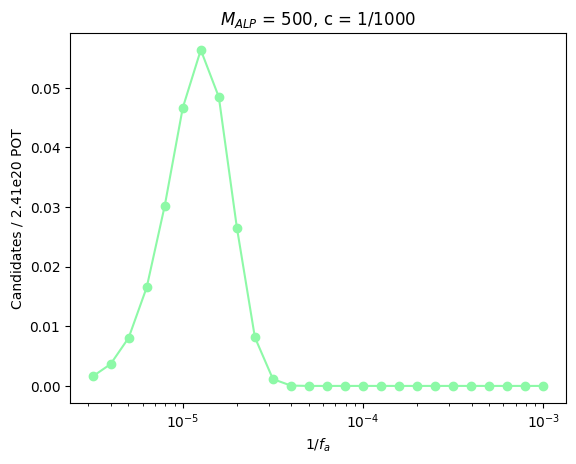

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.001


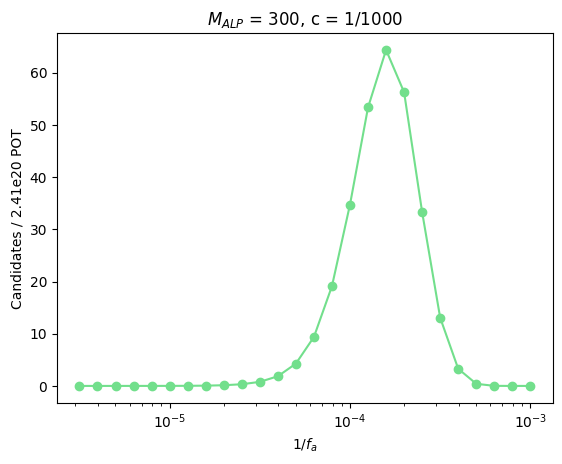

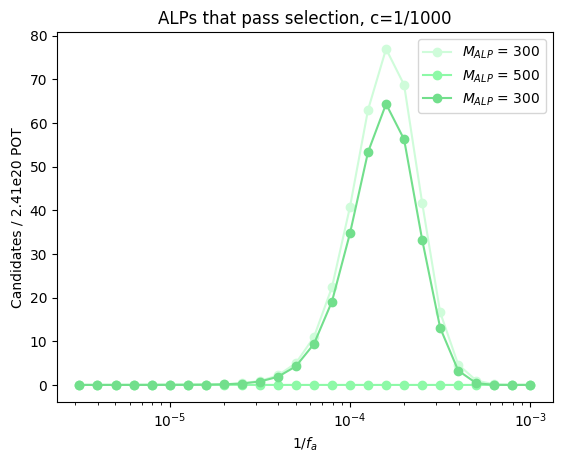

CPU times: user 18min 21s, sys: 20.7 s, total: 18min 42s
Wall time: 18min 54s


In [14]:
%%time
# 23.10.10. FIX IT.

# LOOP OVER CLs

test_cls = [1/36., 1/100., 1/300., 1/1000.] #[1/100.] #
clDenoms = ['36','100', '300', '1000'] #['100'] #
for cl in range(len(test_cls)):

    new_cl = test_cls[cl]
    clDenom = clDenoms[cl]
    if new_cl > 1/200.:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    
    alp_new_ns = [] # one entry per sample (mass point), each entry is a list that has same length as test_inv_fas.
    for i in range(len(alp_nosup_files)):
        #if i==1: break
        new_n = []
        df = selected_evtdf[categories[6+i]]
        name = categories[6+i].name
        print("Scanning over fa's for %a; new cl = " % name + str(new_cl))
        old_fa = alp_nosup_fa[i]
        old_cl = alp_nosup_cAl[i] #float(alp_nosup_mcdfs[i].iloc[0].C2)
        for new_fa in 1./test_inv_fas:
            rescale = []
            for idx in df.index:
                row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
                rescale.append( float(reweight_alps(old_fa, new_fa, old_cl, new_cl, row.start, row.enter, 
                                              row.exit, row.decay_length, row.allowed_decay_fraction))
                              )
            x = sum(np.array(df.scale)*np.array(rescale))
            #print(x)
            new_n.append(x)
        alp_new_ns.append(np.array(new_n))
    
        plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
        plt.xscale('log')
        plt.title(name.split(',')[0] + ', c = 1/' + clDenom)
        plt.ylabel("Candidates / %s" % POTSTR)
        plt.xlabel("$1/f_a$")
        #plt.axhline([10], linestyle=":", color="r", linewidth=2)
        plt.show()
    
    if savestuff:
        alp_new_ns_df = pd.DataFrame(alp_new_ns)
        alp_new_ns_df.to_pickle(
            dir + '241011_alp_new_ns_df_clDenom'+clDenom
        )
    
    for i in range(len(alp_new_ns)):
        plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[6+i].name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    #plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "241011_ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()
    

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+05'"; new cl = 0.01


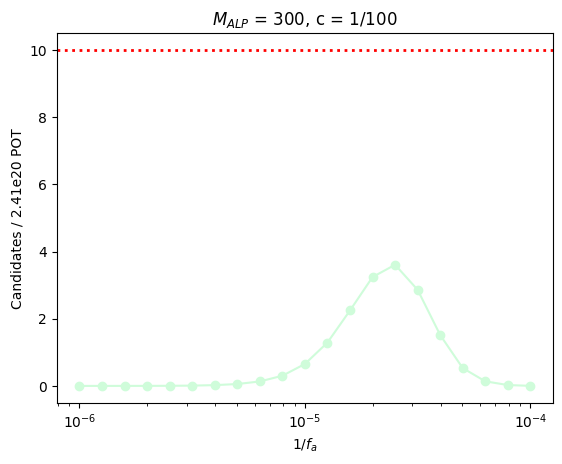

Scanning over fa's for "$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.01


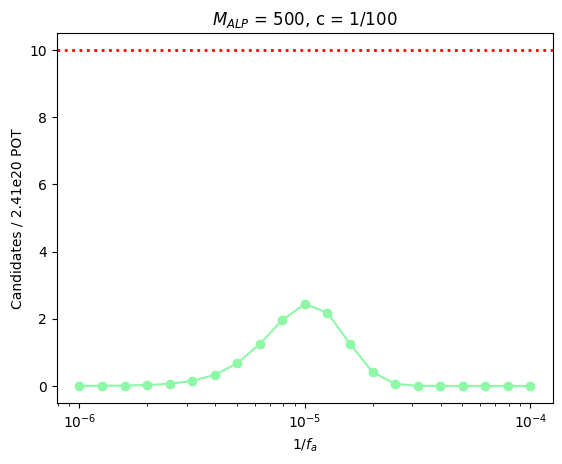

Scanning over fa's for "$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = '1.0e+06'"; new cl = 0.01


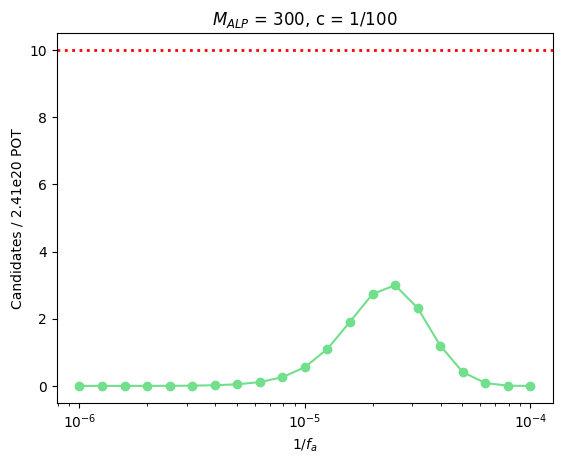

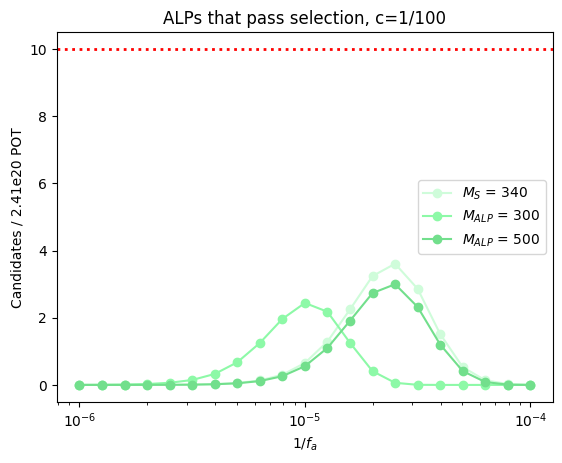

In [27]:
%%time
# 23.10.10. FIX IT.

# LOOP OVER CLs

test_cls = [1/100.] #[1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['100'] #['36','100', '300', '1000']
for cl in range(len(test_cls)):

    new_cl = test_cls[cl]
    clDenom = clDenoms[cl]
    if new_cl > 1/200.:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    
    alp_new_ns = [] # one entry per sample (mass point), each entry is a list that has same length as test_inv_fas.
    for i in range(len(alp_nosup_files)):
        if i==1: break
        new_n = []
        df = selected_evtdf[categories[6+i]]
        name = categories[6+i].name
        print("Scanning over fa's for %a; new cl = " % name + str(new_cl))
        old_fa = alp_nosup_fa[i]
        old_cl = alp_nosup_cAl[i] #float(alp_nosup_mcdfs[i].iloc[0].C2)
        for new_fa in 1./test_inv_fas:
            rescale = []
            for idx in df.index:
                row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
                rescale.append( float(reweight_alps(old_fa, new_fa, old_cl, new_cl, row.start, row.enter, 
                                              row.exit, row.decay_length, row.allowed_decay_fraction))
                              )
            x = sum(np.array(df.scale)*np.array(rescale))
            #print(x)
            new_n.append(x)
        alp_new_ns.append(np.array(new_n))
    
        plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
        plt.xscale('log')
        plt.title(name.split(',')[0] + ', c = 1/' + clDenom)
        plt.ylabel("Candidates / %s" % POTSTR)
        plt.xlabel("$1/f_a$")
        plt.axhline([10], linestyle=":", color="r", linewidth=2)
        plt.show()
    
    if savestuff:
        alp_new_ns_df = pd.DataFrame(alp_new_ns)
        alp_new_ns_df.to_pickle(
            dir + 'alp_new_ns_df_clDenom'+clDenom
        )
    
    for i in range(len(alp_new_ns)):
        plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()
    

In [ ]:
# raw evtdf straight from specific sample file: max ntuple: 1197
raw_df = pd.read_hdf(alp_nosup_files[0], key="evt")
raw_df

In [20]:
#corresponding entry in evtdfs from MC_overhead: max ntuple: 1197 # 
print(len(evtdfs))
for f in df_files: print(f)
evtdfs[6]

11
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M220_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M240_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M260_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M280_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M300_nom_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F2-Higgs_M340_nom_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M300_faE5_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/alp_M500_faE6_evt.df
/exp/icarus/data/users/jdyer/DMCP2023G/axions/2408/alp_M300_faE6_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F-MCNuPhase2_evt.df
/exp/icarus/data/users/gputnam/thesis-work/DMCP2023G/mc-F/F-CohLike_nom_evt.df


slc                          \
                              is_clear_cosmic      vertex               
                                                        x           y   
                                                                        
                                                                        
                                                                        
__ntuple entry rec.slc..index                                           
11       0     17                           0  204.653580 -109.795013   
         1     0                            0 -124.234879    7.164062   
         4     3                            0 -285.035583  119.837585   
         10    9                            0  247.711487   97.787231   
         12    20                           0  182.267731  110.345947   
..                                        ...         ...         ...   
1197     41    8                            0  261.309692  -55.984192   
         42    9                            0  146.398239 -104.030434   
         44    0                            0 -123.750763 -125.776886   
         45    21                           0  177.537689  -83.166748   
         47    10                           0  231.046661   46.849682   

                                                                         \
                                          self    tmatch                  
                                        z            eff       pur  idx   
                                                                          
                                                                          
                                                                          
__ntuple entry rec.slc..index                                             
11       0     17             -306.723206  189  0.861649  0.977045    0   
         1     0              -599.051392  160       NaN       NaN -999   
         4     3              -302.916351  329       NaN       NaN -999   
         10    9              -747.805725  158  0.856717  0.955984    0   
         12    20             -768.890076  193       NaN       NaN -999   
..                                    ...  ...       ...       ...  ...   
1197     41    8              -868.291443  126  0.844695  0.769471    0   
         42    9                71.642632  131  0.825932  0.984886    0   
         44    0               310.934631  113  0.615862  0.954915    0   
         45    21             -652.550598  290       NaN       NaN -999   
         47    10               23.007629  146  0.863774  0.907293    0   

                                                      ...          stub  \
                              producer          nuid  ...          l3cm   
                                       crlongtrkdiry  ...        charge   
                                                      ...                 
                                                      ...                 
                                                      ...                 
__ntuple entry rec.slc..index                         ...                 
11       0     17                    1     -0.016220  ...           NaN   
         1     0                     0     -0.976300  ...           NaN   
         4     3                     0     -0.866026  ...           NaN   
         10    9                     1     -0.048889  ...           NaN   
         12    20                    1     -0.184402  ...  495752.90625   
..                                 ...           ...  ...           ...   
1197     41    8                     1     -0.006515  ...           NaN   
         42    9                     1     -0.009605  ...           NaN   
         44    0                     0     -0.036400  ...           NaN   
         45    21                    1     -0.839730  ...           NaN   
         47    10                    1     -0.059818  ...           NaN   

                         

In [10]:
# evtdf from MC_overhead: max ntuple: 1904  
nomcats = make_categories(evtdf, detailed_bsm=True)
evtdf[nomcats[6]]

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
5      12       1     0                            0 -189.489182 -143.476349   
                2     28                           0  210.301025   87.616409   
                3     0                            0 -292.446136   38.478256   
                4     14                           0  282.161865   26.457581   
                5     0                            0 -168.829803 -127.950592   
..                                               ...         ...         ...   
       1904     40    14                           0  235.119278   68.286377   
                41    1                            0 -224.146790   38.518127   
                42    3                            0 -196.010452   63.779968   
                43    19                           0  282.670654   70.399841   
                48    1                            0 -147.905121  -99.949493   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
5      12       1     0              -560.222351  126  0.884112  0.972651   0   
                2     28             -241.802429  153  0.814105  0.994796   0   
                3     0              -198.954971  127  0.834525  0.866375   0   
                4     14             -854.737488   76  0.837898  0.997791   0   
                5     0               118.297180  201  0.870687  0.903472   0   
..                                           ...  ...       ...       ...  ..   
       1904     40    14              642.314941  166  0.901216  0.989033   0   
                41    1              -344.382935  231  0.645256  0.858714   0   
                42    3               716.154419  225  0.866334  0.998954   0   
                43    19             -749.474487  113  0.914651  0.978030   0   
                48    1               260.891998  187  0.769887  0.971414   0   

                                                             ...  \
                                     producer          nuid  ...   
                                              crlongtrkdiry  ...   
                                                             ...   
                                                             ...   
                                                             ...   
sample __ntuple entry rec.slc..index                         ...   
5      12       1     0                     0     -0.152979  ...   
                2     28                    1      0.028358  ...   
                3     0                     0      0.047501  ...   
                4     14                    1     -0.367159  ...   
                5     0                     0     -0.162461  ...   
..                                        ...           ...  ...   
       1904     40    14                    1     -0.038238  ...   
                41    1                     0     -0.303141  ...   
                42    3                     0     -0.039161  ...   
                43    19                    1     -0.237331  

In [21]:
# selected_evtdf: max ntuple: 1197
categories = make_categories(selected_evtdf, detailed_bsm=True)
selected_evtdf[categories[6]]

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
6      11       18    14                           0  125.474472    8.293701   
                21    13                           0  198.944244 -103.073021   
                29    0                            0 -306.072815  -13.423706   
                42    13                           0  165.850800   34.821442   
       13       22    0                            0 -208.713150  124.074097   
..                                               ...         ...         ...   
       1194     37    11                           0   84.077568   56.103638   
                39    8                            0  219.608673   10.770630   
       1195     5     10                           0  164.567215 -111.584534   
                28    0                            0 -160.716431   96.531555   
       1197     27    0                            0 -341.823090 -143.260544   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
6      11       18    14              334.504303  154  0.840249  0.972560   0   
                21    13               27.747499  116  0.872783  1.000000   0   
                29    0               545.591736  148  0.847835  0.997790   0   
                42    13              544.980408   60  0.827053  0.995620   0   
       13       22    0              -440.074890  158  0.733526  0.984689   0   
..                                           ...  ...       ...       ...  ..   
       1194     37    11             -819.783386  124  0.845924  0.997227   0   
                39    8              -702.958008  169  0.895776  0.965356   0   
       1195     5     10             -435.426788  170  0.836531  0.977314   0   
                28    0               699.508301  197  0.892338  0.972807   0   
       1197     27    0                50.187431  185  0.850177  0.995823   0   

                                                             ... phi_NuMI_mcs  \
                                     producer          nuid  ...                
                                              crlongtrkdiry  ...                
                                                             ...                
                                                             ...                
                                                             ...                
sample __ntuple entry rec.slc..index                         ...                
6      11       18    14                    1     -0.032162  ...    -3.016270   
                21    13                    1      0.562120  ...    -2.748172   
                29    0                     0     -0.032859  ...    -0.865629   
                42    13                    1      0.005974  ...     1.887201   
       13       22    0                     0      0.045730  ...    -2.550498   
..                                        ...           ...  ...          ...   
       1194     37    11                    1     -0.067850  ...     0.228307   
               

In [29]:
i=0
df = selected_evtdf[categories[5+i]]
# df index: (5, 1203, 24, 15)
# Trying to find corresponding index in mcdf: (1203, 24, 0)
mcdf = alp_nosup_mcdfs[i]


In [ ]:
for f in alp_nosup_files: print(f)
    
test_evtdfs = [pd.read_hdf(f, key="evt") for f in alp_nosup_files]

for i in range(3):
    df = test_evtdfs[i]
    mcdf = alp_nosup_mcdfs[i]
    for idx in df.index:
        print(idx)
        row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]


In [38]:

#raw_row = raw_df.loc[(1203, 24)]

slc                          \
                              is_clear_cosmic      vertex               
                                                        x           y   
                                                                        
                                                                        
                                                                        
__ntuple entry rec.slc..index                                           
11       0     17                           0  204.653580 -109.795013   
         1     0                            0 -124.234879    7.164062   
         4     3                            0 -285.035583  119.837585   
         10    9                            0  247.711487   97.787231   
         12    20                           0  182.267731  110.345947   
..                                        ...         ...         ...   
1197     41    8                            0  261.309692  -55.984192   
         42    9                            0  146.398239 -104.030434   
         44    0                            0 -123.750763 -125.776886   
         45    21                           0  177.537689  -83.166748   
         47    10                           0  231.046661   46.849682   

                                                                         \
                                          self    tmatch                  
                                        z            eff       pur  idx   
                                                                          
                                                                          
                                                                          
__ntuple entry rec.slc..index                                             
11       0     17             -306.723206  189  0.861649  0.977045    0   
         1     0              -599.051392  160       NaN       NaN -999   
         4     3              -302.916351  329       NaN       NaN -999   
         10    9              -747.805725  158  0.856717  0.955984    0   
         12    20             -768.890076  193       NaN       NaN -999   
..                                    ...  ...       ...       ...  ...   
1197     41    8              -868.291443  126  0.844695  0.769471    0   
         42    9                71.642632  131  0.825932  0.984886    0   
         44    0               310.934631  113  0.615862  0.954915    0   
         45    21             -652.550598  290       NaN       NaN -999   
         47    10               23.007629  146  0.863774  0.907293    0   

                                                      ...   stub         \
                              producer          nuid  ...   l2cm          
                                       crlongtrkdiry  ... length charge   
                                                      ...                 
                                                      ...                 
                                                      ...                 
__ntuple entry rec.slc..index                         ...                 
11       0     17                    1     -0.016220  ...    NaN    NaN   
         1     0                     0     -0.976300  ...    NaN    NaN   
         4     3                     0     -0.866026  ...    NaN    NaN   
         10    9                     1     -0.048889  ...    NaN    NaN   
         12    20                    1     -0.184402  ...    NaN    NaN   
..                                 ...           ...  ...    ...    ...   
1197     41    8                     1     -0.006515  ...    NaN    NaN   
         42    9                     1     -0.009605  ...    NaN    NaN   
         44    0                     0     -0.036400  ...    NaN    NaN   
         45    21                    1     -0.839730  ...    NaN    NaN   
         47    10                    1     -0.059818  ...    NaN    NaN   

                         

In [39]:
# from final evtdf after event selection
df

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
5      14       44    0                            0 -151.125092  -19.243408   
       17       14    0                            0 -281.454620  -83.731079   
       5        44    0                            0 -151.127029  -19.101074   
       13       17    15                           0  155.340240   46.899780   
       22       37    12                           0   85.129227  113.276466   
..                                               ...         ...         ...   
       1884     22    9                            0  257.235535 -140.482361   
       1886     44    0                            0 -240.265991   73.892792   
       1889     20    13                           0  254.162109   49.423546   
       1891     33    9                            0   89.657990   86.039429   
       1897     28    0                            0 -157.073166   39.885056   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
5      14       44    0              -873.798645  138  0.452496  0.976671   0   
       17       14    0               368.985840   94  0.883163  0.994031   0   
       5        44    0              -873.904724  115  0.451239  0.996519   0   
       13       17    15              423.787903  150  0.843849  0.989571   0   
       22       37    12              -70.490234  167  0.841124  0.967210   0   
..                                           ...  ...       ...       ...  ..   
       1884     22    9               396.092438  145  0.881989  0.975550   0   
       1886     44    0               625.662415  160  0.849185  0.981710   0   
       1889     20    13             -144.755768  295  0.875122  0.865317   0   
       1891     33    9               697.093018  213  0.891773  0.968409   0   
       1897     28    0                28.428545  184  0.333145  0.999475   0   

                                                             ... phi_NuMI_mcs  \
                                     producer          nuid  ...                
                                              crlongtrkdiry  ...                
                                                             ...                
                                                             ...                
                                                             ...                
sample __ntuple entry rec.slc..index                         ...                
5      14       44    0                     0     -0.037694  ...    -0.838926   
       17       14    0                     0     -0.026512  ...     2.198179   
       5        44    0                     0     -0.030079  ...     1.890752   
       13       17    15                    1     -0.046959  ...     1.948224   
       22       37    12                    1     -0.053940  ...    -0.877071   
..                                        ...           ...  ...          ...   
       1884     22    9                     1     -0.028595  ...     1.197644   
       1886    

In [31]:
mcdf

time         E    M         start  \
                                                                          x   
__ntuple entry rec.mc.prtl..index                                             
11       0     0                   2712.822206  1.511482  0.3 -31512.037109   
         1     0                   2678.010847  5.152475  0.3 -31512.037109   
         2     0                   2742.779588  1.489510  0.3 -31512.037109   
         3     0                   2823.945162  0.929077  0.3 -31512.037109   
         4     0                   2705.081754  1.365066  0.3 -31512.037109   
...                                        ...       ...  ...           ...   
1197     45    0                   2671.556987  3.293557  0.3 -31512.037109   
         46    0                   2716.061793  1.539860  0.3 -31512.037109   
         47    0                   2696.863463  2.112327  0.3 -31512.037109   
         48    0                   2689.304458  2.145978  0.3 -31512.037109   
         49    0                   2673.067886  8.316487  0.3 -31512.037109   

                                                               enter  \
                                             y         z           x   
__ntuple entry rec.mc.prtl..index                                      
11       0     0                  -3364.491211 -73363.25  -56.444786   
         1     0                  -3364.491211 -73363.25 -257.189240   
         2     0                  -3364.491211 -73363.25 -368.489990   
         3     0                  -3364.491211 -73363.25 -103.650681   
         4     0                  -3364.491211 -73363.25  -99.112846   
...                                        ...       ...         ...   
1197     45    0                  -3364.491211 -73363.25 -368.489990   
         46    0                  -3364.491211 -73363.25   40.185844   
         47    0                  -3364.491211 -73363.25 -169.377686   
         48    0                  -3364.491211 -73363.25 -368.489990   
         49    0                  -3364.491211 -73363.25 -368.489990   

                                                                 exit  \
                                            y           z           x   
__ntuple entry rec.mc.prtl..index                                       
11       0     0                  -136.747345 -904.950623  368.489990   
         1     0                     9.060390 -904.950623  368.489990   
         2     0                   -63.515217  747.619141 -302.374725   
         3     0                   -78.705254 -904.950623  368.489990   
         4     0                    10.057106 -904.950623  368.489990   
...                                       ...         ...         ...   
1197     45    0                    68.435356 -789.006348  325.742432   
         46    0                    52.134903 -904.950623  368.489990   
         47    0                     3.596873 -904.950623  368.489990   
         48    0                    24.277184 -735.071350  334.764618   
         49    0                   -37.147968 -397.318085  187.348404   

                                                            decay_length  \
                                            y           z                  
__ntuple entry rec.mc.prtl..index                                          
11       0     0                   -93.143631   73.891266  101806.587815   
         1     0                    76.594269  545.565247  353491.492170   
         2     0                   -56.507507  904.950623  100265.519693   
         3     0                   -29.312294  184.265167   60428.529061   
         4     0                    60.289562  173.640671   91517.575490   
...                                       ...         ...            ...   
1197     45    0                   144.960007  828.773254  225401.327339   
         46    0                    87.685249 -151.014511  103795.675215   
         47    0                    61.396233  338.497681  143693.4

In [ ]:
# Notes: mcdf and the raw evtdf that comes from the file have the same max tuple. (1197)
#        But the max tuple from the selected events dataframe is much larger than those's max. (1897)

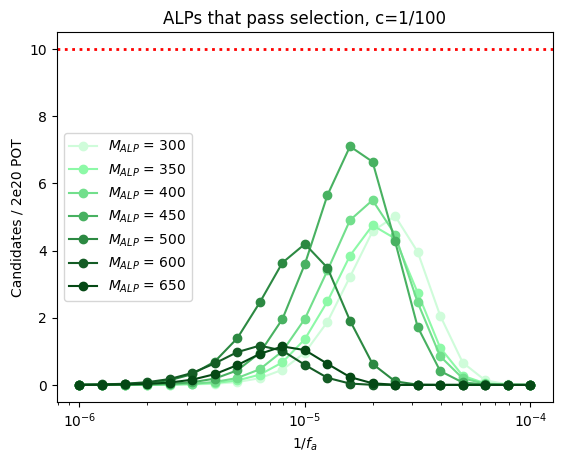

In [21]:
for i in range(len(alp_new_ns)):
    plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
plt.xscale('log')
#plt.yscale('log')
plt.title('ALPs that pass selection, c=1/'+clDenom)
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$1/f_a$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
if savestuff:
    plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
plt.show()

#test = np.logspace(-5.5,-3,21)
#plt.plot(test, test)
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

In [59]:
# See how things change if you just scale cl:

df = alp_nosup_mcdfs[0]
name = categories[5].name
print(name.split(',')[0], '\n')
old_fa = alp_nosup_fa[0]
old_cl = alp_nosup_cl[0]
idx = df.index[0] # note: the df I'm getting idx from here is different than what I get it from in func def.
#print(idx)
row = df.loc[idx] 
new_cl = 1/300.
factor = reweight_alps(old_fa, 10000., old_cl, old_cl, row.start, row.enter, 
              row.exit, row.decay_length, row.allowed_decay_fraction)
print('\n', float(factor))
#df
#row

$M_{ALP}$ = 300 

cl, fa:  0.01 ,  10000.0
decay_weight:  3.96477414862782e-13
mean_dist:  2880.199719274784
decay in icarus:  4.0118938432227004e-13
f:  0.9882549996494848

 1.3051631069858734e-08


In [ ]:
selected_evtdf

In [45]:
evtdf

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      10       6     0                            0 -137.550140   80.211090   
       49       2     1                            0 -139.672394  -60.575729   
       87       20    10                           0  210.485367  -56.962399   
       105      15    14                           0  142.216400  -46.298374   
       110      13    0                            0 -165.103683 -161.912247   
..                                               ...         ...         ...   
12     4279     172   1                            0 -187.539886   23.401184   
       4444     45    0                            0 -198.929413 -101.789307   
       4502     127   19                           0  255.800964  -55.191528   
       6150     236   17                           0  214.587585   21.150330   
       6645     120   0                            0 -160.763794   59.780487   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
0      10       6     0               556.435852  182  0.922363  0.988839   0   
       49       2     1              -293.824646  250  0.709152  0.944103   0   
       87       20    10             -195.739227  130  0.867942  0.989385   0   
       105      15    14              404.727722  176  0.848213  0.992334   0   
       110      13    0               615.129761   72  0.893664  0.994344   0   
..                                           ...  ...       ...       ...  ..   
12     4279     172   1               716.523071  261  0.889747  0.979087   0   
       4444     45    0               763.679688  151  0.777646  0.974933   0   
       4502     127   19             -763.117737  118  0.897586  0.999999   0   
       6150     236   17             -627.641968   83  0.888946  0.985770   0   
       6645     120   0              -558.081665  200  0.852075  0.965248   0   

                                                             ...  \
                                     producer          nuid  ...   
                                              crlongtrkdiry  ...   
                                                             ...   
                                                             ...   
                                                             ...   
sample __ntuple entry rec.slc..index                         ...   
0      10       6     0                     0     -0.117672  ...   
       49       2     1                     0     -0.187669  ...   
       87       20    10                    1      0.068722  ...   
       105      15    14                    1     -0.114128  ...   
       110      13    0                     0      0.153792  ...   
..                                        ...           ...  ...   
12     4279     172   1                     0     -0.025453  ...   
       4444     45    0                     0      0.026420  ...   
       4502     127   19                    1     -0.062157  ...   
       6150     236   17                    1     -0.068047  

### Check what the rescaling factors look like. - Okay to skip or delete this section. (But keep the "Sanity Checks!"

Plot a histogram.

If flat, then that means the accept/reject algorithm in the generator would perform pretty much the same way, at least over the energy range of the present sample.

If not flat, should worry more.


In [21]:
# Check it for just one benchmark model for now. Do change both cl and fa. 

df = alp_nosup_mcdfs[0]
name = categories[5].name
print(name.split(',')[0], '\n')
old_fa = alp_nosup_fa[0]
old_cl = alp_nosup_cl[0]

new_cl = 1/300.
new_fa = 10000.

scale_factors = []
old_decay_weights = []
for idx in df.index:
    row = df.loc[idx] 
    output = reweight_alps(old_fa, new_fa, old_cl, old_cl, row.start, row.enter, 
                           row.exit, row.decay_length, row.allowed_decay_fraction)
    scale_factors.append([0])
    old_decay_weights.append([1])

#df

$M_{ALP}$ = 300 



Old cl, fa:  0.01 ,  100000.0
New cl, fa:  0.0033333333333333335 ,  10000.0
0.0, 239.27838039628315, 0.05205742568251677, 2.015516362717654


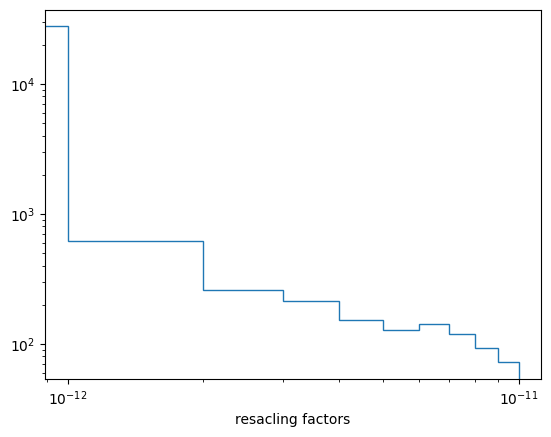

In [19]:
print('Old cl, fa: ', old_cl, ', ', old_fa)
print('New cl, fa: ', new_cl, ', ', new_fa)

print(min(scale_factors), max(scale_factors), 
      np.mean(np.array(scale_factors)), np.std(np.array(scale_factors)), sep=', ')

xrange = (0,1e-11)
plt.hist(scale_factors, histtype='step', range=xrange)
plt.xlabel('resacling factors')
plt.yscale('log')
plt.xscale('log')
plt.show()




<class 'float'>


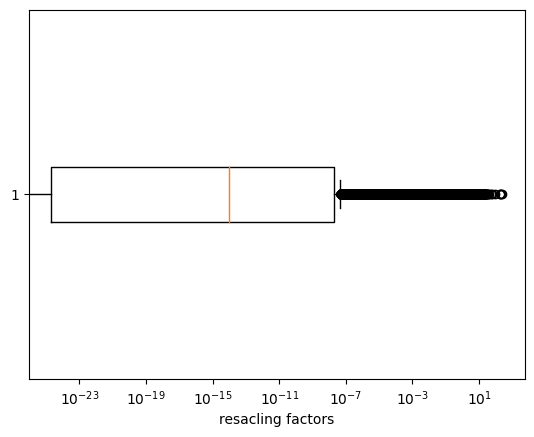

In [18]:
print(type(scale_factors[0]))
plt.boxplot(scale_factors, vert=False)
plt.xscale('log')
plt.xlabel('resacling factors')
plt.show()

## Sanity Checks

Per Slack conversation with Josh 17 October 2023, verify that:

For a given benchmark mass:
1) Peak height is proportional to 1/cl^2
2) optimal fa proportional to cl

These trends are expected to break down when you get to low cl, around 1/1000, where the the lepton decay mode no longer dominates.

In [21]:
new_ns_bycl = [
    'alp_new_ns_df_clDenom36',
    'alp_new_ns_df_clDenom100',
    'alp_new_ns_df_clDenom300',
    'alp_new_ns_df_clDenom1000'
]

# 7 is the number of benchmark masses we are testing.
blank = []
best_fas = [blank.copy()] * 7
peak_rates = [blank.copy()] * 7
              
# ISSUE: appending lists within lists affects all lists in the superlist.

m300_best_fa = [] # will have same length as number of cl_s I tested.
m300_peak_rate = []

for n in range(len(new_ns_bycl)):
    df = pd.read_pickle(dir+new_ns_bycl[n])
    #alp_new_ns_df_clDenom100.shape
    if n <2:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    row = np.array(df.loc[0])
    m300_peak_rate.append(np.max(row))
    m300_best_fa.append(test_inv_fas[np.argmax(row)])
    
    continue
    # insert for loop over masses (df rows) here. for now, just do the first row.
    for m in range(7):
        #print('m:', m)
        row = np.array(df.loc[m])
        #print(row.shape)
        peak_rates[m].append(np.max(row))
        #print(np.max(row))
        best_fas[m].append(test_inv_fas[np.argmax(row)])
        #print(test_inv_fas[np.argmax(row)])
        #print('shapes: ', len(peak_rates[m]), ', ', len(peak_rates[m+1]))
        #print('')
    
    #print('')
    #peak_rate = np.max()
        

# rows are masses
# columns are values of fa

4
4


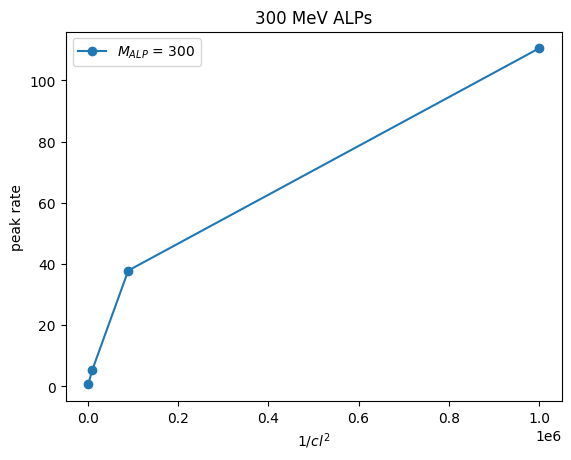

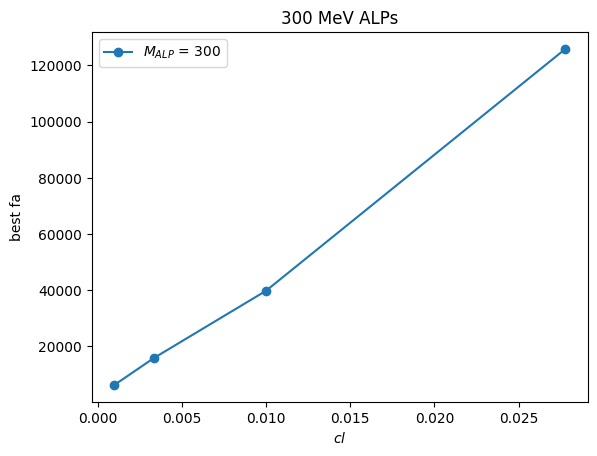

In [37]:
#for m in range(7):
#    plt.plot([1/36**2, 1/100**2, 1/300**2, 1/1000**2], )

print(len(m300_peak_rate))
print(len(m300_best_fa))
i=0

plt.plot([36**2, 100**2, 300**2, 1000**2], m300_peak_rate, '-o', 
         label=categories[5+i].name.split(',')[0])#, color=greens[i])
plt.legend()
plt.title('300 MeV ALPs')
plt.xlabel('$1/cl^2$')
plt.ylabel('peak rate')
plt.show()

plt.plot([1/36, 1/100, 1/300, 1/1000], np.array([1.]*len(m300_best_fa))/m300_best_fa, '-o', 
         label=categories[5+i].name.split(',')[0])#, color=greens[i])
plt.legend()
plt.title('300 MeV ALPs')
plt.xlabel('$cl$')
plt.ylabel('best fa')
plt.show()

## To plot the sensitivity plots I made above, but by reading in what I've already calculated and saved:

Also, here I will add stars at the benchmarks that were used for generation (and so have no weight rescaling).

Also print the value of parameter on x axis that gives peak sensitivity for each curve.

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000160,0.000402,0.001009,0.002531,0.006340,0.015857,0.039555,0.098280,0.242661,5.933254e-01,...,9.016068e+01,1.104639e+02,1.014032e+02,6.526770e+01,2.813650e+01,8.077088e+00,1.434241e+00,1.049873e-01,1.468789e-03,1.304792e-06
1,0.000244,0.000612,0.001536,0.003852,0.009653,0.024163,0.060355,0.150267,0.372193,9.143850e-01,...,1.522846e+02,1.876202e+02,1.714794e+02,1.077666e+02,4.320127e+01,1.066030e+01,1.830888e+00,2.429510e-01,1.343658e-02,1.082553e-04
2,0.000388,0.000975,0.002448,0.006141,0.015400,0.038579,0.096491,0.240732,0.598220,1.477288e+00,...,3.286822e+02,4.653868e+02,5.104359e+02,4.040132e+02,2.146634e+02,7.182714e+01,1.600231e+01,3.088674e+00,3.985441e-01,1.497074e-02
3,0.000851,0.002121,0.005266,0.012986,0.031682,0.076008,0.177602,0.398295,0.838483,1.603896e+00,...,6.671230e-02,1.281982e-02,2.002599e-03,8.770206e-05,3.942762e-07,4.498030e-11,1.492032e-17,4.755243e-28,6.638213e-45,8.078268e-72
4,0.003886,0.008734,0.018482,0.035754,0.060774,0.086241,0.096027,0.078223,0.043228,1.493126e-02,...,3.785812e-24,1.495545e-37,5.505488e-59,4.217384e-93,2.948378e-147,3.716303e-233,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.002664,0.004420,0.006304,0.007341,0.006536,0.004097,0.001582,0.000295,0.000018,2.013188e-07,...,1.163246e-147,4.213142e-234,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.001760,0.003882,0.007961,0.014609,0.022737,0.027960,0.024989,0.014901,0.005448,1.099719e-03,...,1.624766e-47,6.426605e-75,1.670036e-118,1.043461e-187,1.676406e-297,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


100000.0
100000.0
100000.0
100000.0
100000.0
1000000.0
1000000.0


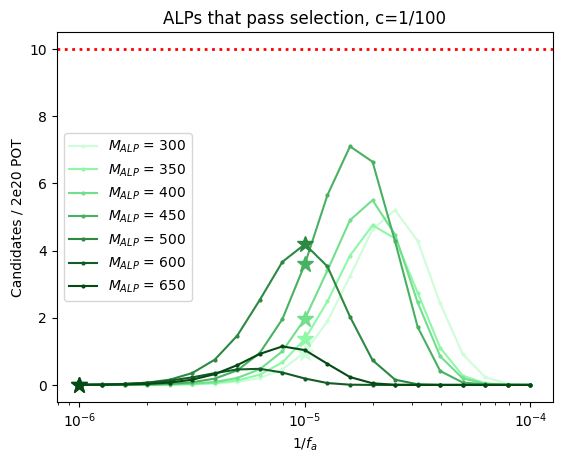

(1, 21)


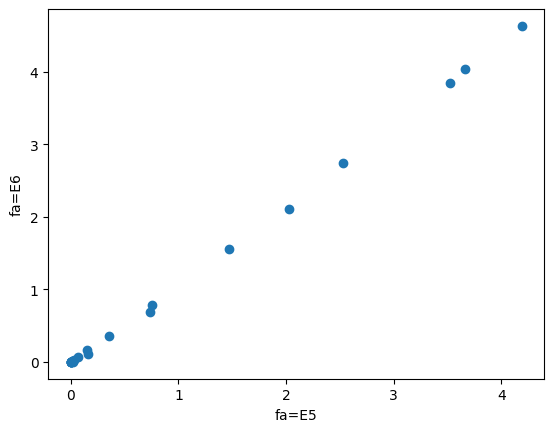

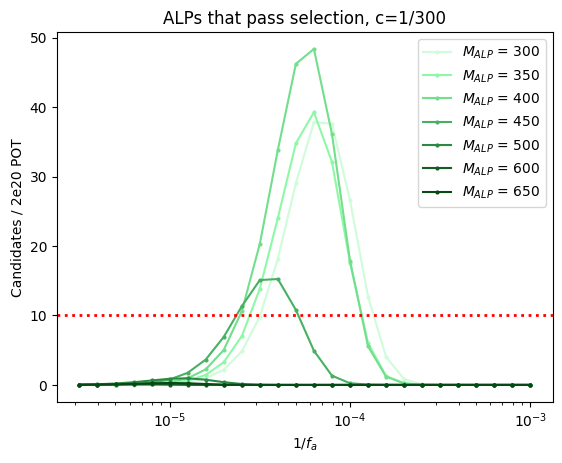

(1, 26)


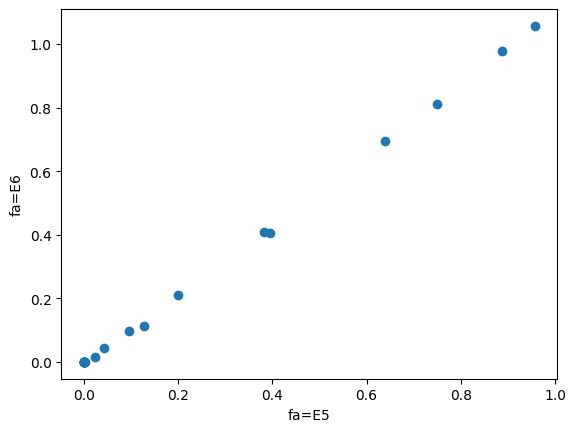

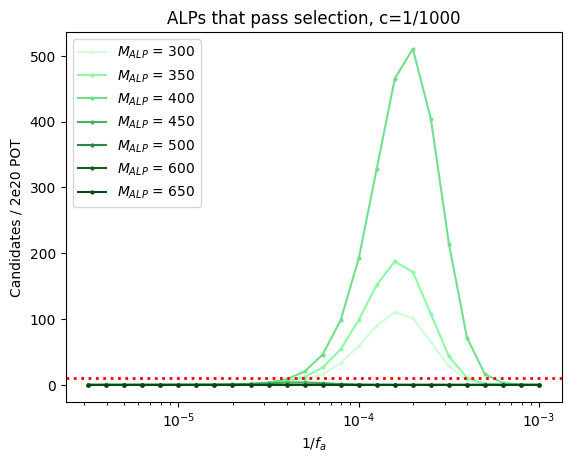

(1, 26)


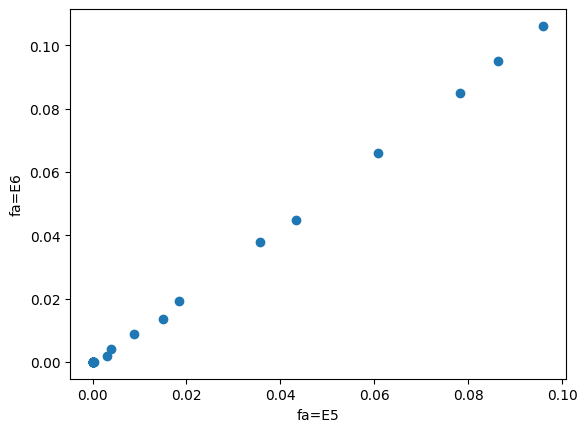

In [22]:
# Replace the old 500 MeV ALP (fa=E5) scaling with the new 500 MeV ALP (fa=E6) scaling:

new_ns_bycl = [
    'alp_new_ns_df_clDenom36',
    'alp_new_ns_df_clDenom100',
    'alp_new_ns_df_clDenom300',
    'alp_new_ns_df_clDenom1000'
]
test_cls = [1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['36','100', '300', '1000']

orig_dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/'
for n in range(1,len(new_ns_bycl)):
    clDenom = clDenoms[n]
    #df = pd.read_pickle(dir+new_ns_bycl[n])
    df = pd.read_pickle(orig_dir+new_ns_bycl[n])
    if n <2:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    for m in range(len(df.index)):
        plt.plot(test_inv_fas, df.loc[df.index[m]], '-o', markersize=2, label=categories[5+m].name.split(',')[0], color=greens[m]) #
        if clDenom=='100':
            df100 = selected_evtdf[categories[5+m]]
            #plt.plot(1.E-5, 8,'*', markersize=12)
            print(alp_nosup_fa[m])
            plt.plot(1./alp_nosup_fa[m], sum(np.array(df100.scale)),'*', markersize=12, color=greens[m])
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()
    
    df_E6 = pd.read_pickle(orig_dir+'ALP500MeV_faE6/'+new_ns_bycl[n])
    print(df_E6.shape)
    #print(df.index)
    plt.plot(df.loc[df.index[4]], df_E6.loc[df_E6.index[0]], 'o')
    plt.xlabel('fa=E5')
    plt.ylabel('fa=E6')
    plt.show()

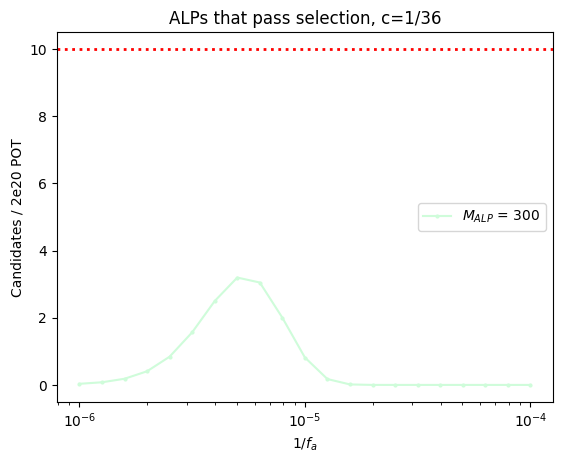

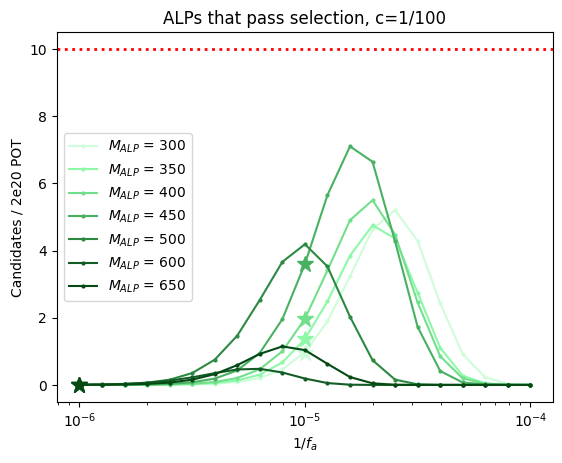

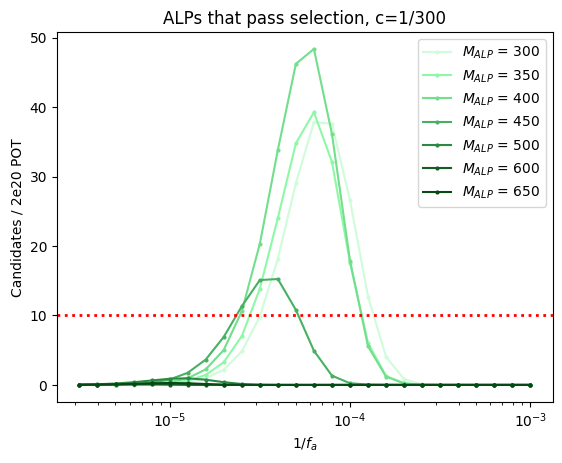

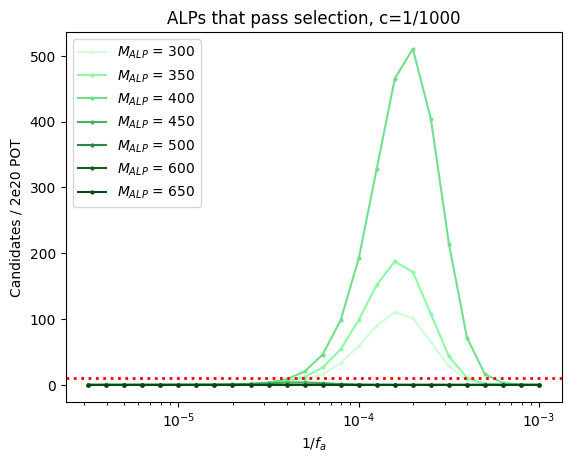

In [22]:
new_ns_bycl = [
    'alp_new_ns_df_clDenom36',
    'alp_new_ns_df_clDenom100',
    'alp_new_ns_df_clDenom300',
    'alp_new_ns_df_clDenom1000'
]
test_cls = [1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['36','100', '300', '1000']

orig_dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/'
for n in range(len(new_ns_bycl)):
    clDenom = clDenoms[n]
    #df = pd.read_pickle(dir+new_ns_bycl[n])
    df = pd.read_pickle(orig_dir+new_ns_bycl[n])
    if n <2:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    for m in range(len(df.index)):
        plt.plot(test_inv_fas, df.loc[df.index[m]], '-o', markersize=2, label=categories[5+m].name.split(',')[0], color=greens[m]) #
        if clDenom=='100':
            df100 = selected_evtdf[categories[5+m]]
            #plt.plot(1.E-5, 8,'*', markersize=12)
            plt.plot(1./alp_nosup_fa[m], sum(np.array(df100.scale)),'*', markersize=12, color=greens[m])
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()